In [1]:
import ROOT
import math
from ctypes import c_double
import numpy as np
import pandas as pd
from IPython.display import clear_output

from ipytools import *

def draw_phaseshift(timedata, xtit="E_{c.m.} (MeV)", ytit="#delta_{0} (degree)", yrange=[],xrange=[],legshow=True,grid=True,ticks=True):
 c1.cd()
 if grid:
  ROOT.gPad.SetGrid()
 if ticks:
  ROOT.gPad.SetTicks()

 setcolors(timedata.mg,color,Alpha=timedata.Alpha)
 timedata.resetLeg()

 mg=timedata.mg.Clone()
 #mg=timedata.getiGraph(5)
 leg=timedata.leg.Clone()
 mg.GetYaxis().SetTitle(ytit)
 mg.GetYaxis().SetTitleOffset(1.)
 mg.GetYaxis().SetTitleSize(0.06)
 mg.GetYaxis().SetLabelSize(0.06)
 mg.GetYaxis().SetNdivisions(505)
 if len(yrange) == 2:
  mg.GetYaxis().SetRangeUser(yrange[0],yrange[1])
 mg.GetXaxis().SetTitle(xtit)
 mg.GetXaxis().SetTitleSize(0.06)
 mg.GetXaxis().SetLabelSize(0.06)
 mg.GetXaxis().SetTitleOffset(1.)
 if len(xrange) == 2:
  mg.GetXaxis().SetRangeUser(xrange[0],xrange[1])
 else:
  mg.GetXaxis().SetRangeUser(0,50)
 if (timedata.drawoption=="AC3"):
  mg.Draw("ACX")
  mg.Draw("3")
 else:
  mg.Draw(str(timedata.drawoption))
 if legshow:
  leg.Draw("same")
 c1.Draw()

In [3]:
#in this cell you run draw_phaseshift(...) for first time, the canvas dispaly well
# when I run this cell again, the canvas disappear

%jsroot off
tstart=17
tend=17
t_list=[17]
spin=2
sub="_misnered"
labels=["a", "b"]

timedata=ROOT.timedata(f"output-for-test/pot_{spin*2+1}s{spin}_cen_FconfNOmgccc_t%03d_B01_1600conf_080bin{sub}_observables.root",t_list,"phase_shift_nocoul",1/math.sqrt(2*m_red),180/3.1415926535897, "AC3")
timedata.setFormula("x*x")
#timedata.leg.SetX1(0.63)
timedata.leg.SetY1(0.2)
#timedata.leg.SetX2(0.93)
timedata.leg.SetY2(0.5)
draw_phaseshift(timedata,yrange=[0,33],legshow=False)
leg2 = ROOT.TLegend(timedata.leg.GetX1(), timedata.leg.GetY1(), timedata.leg.GetX2(), timedata.leg.GetY2())
t_list_index=[[i,t_list[i]] for i,t in enumerate(t_list)]
for i,t in sorted(t_list_index, key=lambda x: x[1], reverse=True):
  leg2.AddEntry(timedata.mg.GetListOfGraphs().At(i), f"t/a = {t}", "fl")
if spin==1:
  leg2.Draw("same")
#timedata.mg.Draw("p same")

#add a label
Label=ROOT.TLatex(0.17,0.78, f"({labels[spin-1]}) {{}}^{{{2*spin+1}}}S_{{{spin}}}")
Label.SetTextSize(0.06)
Label.SetNDC()
Label.Draw()
cell2_runtime+=1

print("This cell has run for ",cell2_runtime, " times")

This cell has run for  2  times


In [4]:
# if I run this drawing function again, the canvas will not show
draw_phaseshift(timedata,yrange=[0,33],legshow=False)

In [5]:
# I changed the drawing object and run this cell, no canvas appears.
spin=1
timedata2=ROOT.timedata(f"output-for-test/pot_{spin*2+1}s{spin}_cen_FconfNOmgccc_t%03d_B01_1600conf_080bin{sub}_observables.root",t_list,"phase_shift_nocoul",1/math.sqrt(2*m_red),180/3.1415926535897, "AC3")
draw_phaseshift(timedata2,yrange=[0,33],legshow=False)
#add a label
Label=ROOT.TLatex(0.17,0.78, "with timedata2")
Label.SetTextSize(0.06)
Label.SetNDC()
Label.Draw()
c1.Draw()

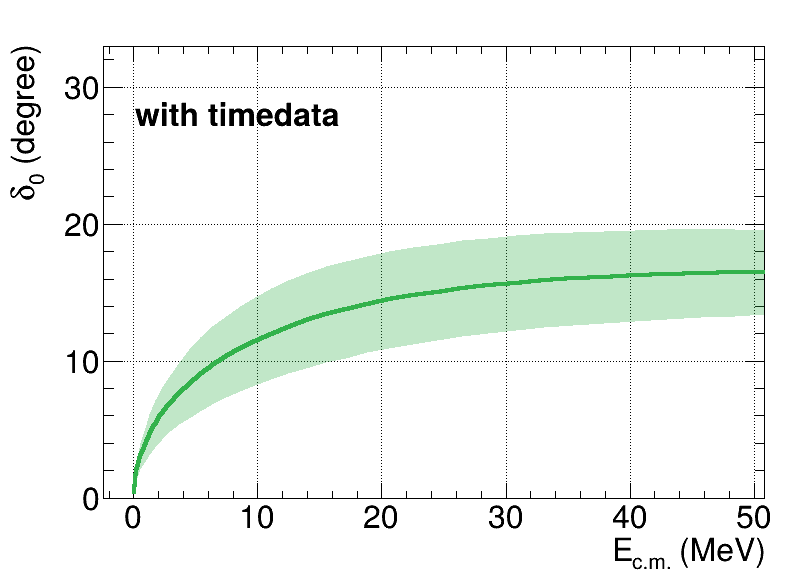

In [6]:
#if the cell which have c1.Draw() and not change axis ranges, the canvas shows well
# no matter how many times you run it, canvas still displays well
c1.Draw()

In [7]:
# if you run this cell the canvas above will show with this cell's figure
draw_phaseshift(timedata,yrange=[0,33],legshow=False)
#add a label
Label=ROOT.TLatex(0.17,0.78, "with timedata")
Label.SetTextSize(0.06)
Label.SetNDC()
Label.Draw()

In [9]:
#and we can find c1 with name "c" in gROOT, and there are objects drawing on it.
ROOT.gROOT.GetListOfCanvases().ls()

OBJ: TList	Canvases	Doubly linked list : 0
 Canvas Name=c Title=c Option=
  TCanvas fXlowNDC=0 fYlowNDC=0 fWNDC=1 fHNDC=1 Name= c Title= c Option=
   OBJ: TList	TList	Doubly linked list : 0
    TFrame  X1= -2.410596 Y1=0.000000 X2=50.846663 Y2=33.000000
    OBJ: TMultiGraph	output-for-test/pot_5s2_cen_FconfNOmgccc_t%03d_B01_1600conf_080bin_misnered_observables.root_phase_shift_nocoul_mg_timedata	 : 0 at: 0x631a95d9c810
    OBJ: TMultiGraph	output-for-test/pot_5s2_cen_FconfNOmgccc_t%03d_B01_1600conf_080bin_misnered_observables.root_phase_shift_nocoul_mg_timedata	 : 0 at: 0x631a95d9c810
    Text  X=0.170000 Y=0.780000 Text=with timedata
 Canvas Name=c3 Title=c3 Option=
  TCanvas fXlowNDC=0 fYlowNDC=0 fWNDC=1 fHNDC=1 Name= c3 Title= c3 Option=
   OBJ: TList	TList	Doubly linked list : 0
 Canvas Name=c2 Title=c2 Option=
  TCanvas fXlowNDC=0 fYlowNDC=0 fWNDC=1 fHNDC=1 Name= c2 Title= c2 Option=
   OBJ: TList	TList	Doubly linked list : 0
    TPad fXlowNDC=0.01 fYlowNDC=0.01 fWNDC=0.48 fHNDC=0

In [ ]:
tmg=timedata.mg.Clone()
#f=c1.DrawFrame(0.,0.,50.,33.)
tmg.Draw("cx")
c1.Draw()

In [ ]:
tmg=timedata.mg.Clone()
f=c1.DrawFrame(0.,0.,50.,33.)
tmg.Draw("cx")
c1.Draw()